# Analysis
Calculates percentage gains and losses for active candidates after a candidate drops.

## Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import numpy as np
import pandas as pd
import os
from IPython.display import display, HTML

import stats

## Read Files Written in 02-DataCleaning

In [2]:
candidates = pd.read_csv('candidates.csv', index_col='name')

## Read File Written in 03-Modeling

In [3]:
polls = pd.read_csv('bootPolls.csv')

Convert date from string to datetime.

In [4]:
polls.date = pd.Series(pd.DatetimeIndex(polls.date))
polls.index = polls.date
del polls['date']

candidates.date = pd.to_datetime(candidates.date)

## Read Files Written in 04-Exploration

In [5]:
PollingBeforeDrop = pd.read_csv('PollingBeforeDrop.csv')
PollingAfterDrop = pd.read_csv('PollingAfterDrop.csv')

PollingBeforeDrop.index = PollingBeforeDrop['name']
PollingAfterDrop.index = PollingAfterDrop['name']

del PollingBeforeDrop['name']
del PollingAfterDrop['name']

## Calculate Difference
Create a DataFrame subtracting PollingBeforeDrop from PollingAfterDrop.

In [6]:
PollingBeforeDrop = PollingBeforeDrop.fillna(0)
PollingBeforeDrop.head()

,Trump,Cruz,Rubio,Kasich,Carson,Bush,Christie,Fiorina,Gilmore,Huckabee,Paul,Santorum,Undecided
name,,,,,,,,,,,,,
Carson,40.800500,17.495981,17.102741,6.876278,8.385556,0.000000,0.000000,0.000000,0.000000,0,0,0,9.338944
Bush,37.908111,18.944333,13.781222,5.516611,8.391333,5.116278,0.000000,0.000000,0.000000,0,0,0,10.342111
Christie,35.474444,20.010741,15.635833,3.801296,7.897593,4.490926,2.583426,2.104815,0.032778,0,0,0,7.968148
Fiorina,35.474444,20.010741,15.635833,3.801296,7.897593,4.490926,2.583426,2.104815,0.032778,0,0,0,7.968148
Gilmore,38.380981,19.136796,13.422259,3.697426,8.916296,5.476870,0.000000,0.000000,0.026667,0,0,0,10.942704


In [7]:
PollingAfterDrop = PollingAfterDrop.fillna(0)
PollingAfterDrop.head()

,Trump,Cruz,Rubio,Kasich,Carson,Bush,Christie,Fiorina,Gilmore,Huckabee,Paul,Santorum,Undecided
name,,,,,,,,,,,,,
Carson,43.887400,21.298674,12.443674,9.685652,0.000000,0.000000,0,0,0.000,0,0,0,12.684600
Bush,36.779764,18.856403,15.899097,7.581278,7.993028,0.000000,0,0,0.000,0,0,0,12.890431
Christie,37.343959,18.660365,14.053348,6.690889,8.335242,4.605132,0,0,0.025,0,0,0,10.286066
Fiorina,37.343959,18.660365,14.053348,6.690889,8.335242,4.605132,0,0,0.025,0,0,0,10.286066
Gilmore,37.084425,18.743512,14.131349,6.806091,8.400952,4.518796,0,0,0.000,0,0,0,10.314874


In [8]:
PollingDiff = PollingAfterDrop - PollingBeforeDrop
PollingDiff

,Trump,Cruz,Rubio,Kasich,Carson,Bush,Christie,Fiorina,Gilmore,Huckabee,Paul,Santorum,Undecided
name,,,,,,,,,,,,,
Carson,3.086900,3.802693,-4.659067,2.809374,-8.385556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.345656
Bush,-1.128347,-0.087931,2.117875,2.064667,-0.398306,-5.116278,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.548319
Christie,1.869514,-1.350376,-1.582486,2.889593,0.437649,0.114206,-2.583426,-2.104815,-0.007778,0.000000,0.000000,0.000000,2.317918
Fiorina,1.869514,-1.350376,-1.582486,2.889593,0.437649,0.114206,-2.583426,-2.104815,-0.007778,0.000000,0.000000,0.000000,2.317918
Gilmore,-1.296557,-0.393284,0.709090,3.108665,-0.515344,-0.958074,0.000000,0.000000,-0.026667,0.000000,0.000000,0.000000,-0.627829
Huckabee,-2.201456,1.573132,3.610006,0.141104,-0.068343,-0.605542,0.594831,0.288980,-0.061848,-1.808667,0.118567,-0.437556,-1.143208
Paul,-0.081481,1.900925,0.511203,-0.071281,1.564111,1.124303,0.067426,0.486898,-0.253667,0.000000,-2.774917,-0.696597,-1.776924
Santorum,-0.081481,1.900925,0.511203,-0.071281,1.564111,1.124303,0.067426,0.486898,-0.253667,0.000000,-2.774917,-0.696597,-1.776924


Tests for polling differences to sum out to be about zero.

In [9]:
for i in range(len(PollingDiff.index)):
    dSum = sum(PollingDiff.iloc[i].dropna())
    assert dSum < 0.0001 and dSum > -0.0001

## Obtain Stats

In [10]:
statFrame = pd.DataFrame(stats.GenStats(PollingBeforeDrop, PollingAfterDrop, PollingDiff))
statFrame = statFrame[['name', 'Polling Differences', 'Polling of Dropout', 'Polling Sum Negative', 'Polling Sum Positive',
                       'Polling Sum Positive Percentages', 'Winner Names', 'Winner Percs', 'Winner Polls Before',
                       'Winner Polls After', 'Winner Polls Diff']]
statFrame.index = statFrame.name
del statFrame['name']  # deletes duplicate 'name' column since the index is now also 'name'
statFrame.head()

,Polling Differences,Polling of Dropout,Polling Sum Negative,Polling Sum Positive,Polling Sum Positive Percentages,Winner Names,Winner Percs,Winner Polls Before,Winner Polls After,Winner Polls Diff
name,,,,,,,,,,
Carson,Trump 3.086900 Cruz 3.802693 Ru...,-8.385556,-4.659067,13.044622,Trump 0.236642 Cruz 0.291514 Ru...,"[Cruz, Undecided]","[0.256477765209, 0.291514198557]","[17.4959814815, 9.33894444444]","[21.2986740741, 12.6846]","[3.80269259259, 3.34565555556]"
Bush,Trump -1.128347 Cruz -0.087931 Ru...,-5.116278,-1.614583,6.730861,Trump 0.000000 Cruz 0.000000 Ru...,[Undecided],[0.378602292096],[10.3421111111],[12.8904305556],[2.54831944444]
Christie,Trump 1.869514 Cruz -1.350376 Ru...,-2.583426,-5.045454,7.628880,Trump 0.245058 Cruz 0.000000 Ru...,[Kasich],[0.378770223204],[3.8012962963],[6.69088888889],[2.88959259259]
Fiorina,Trump 1.869514 Cruz -1.350376 Ru...,-2.104815,-5.524065,7.628880,Trump 0.245058 Cruz 0.000000 Ru...,[Kasich],[0.378770223204],[3.8012962963],[6.69088888889],[2.88959259259]
Gilmore,Trump -1.296557 Cruz -0.393284 Ru...,-0.026667,-3.791089,3.817755,Trump 0.000000 Cruz 0.000000 Ru...,[Kasich],[0.814265217899],[3.69742592593],[6.80609126984],[3.10866534392]


## Graphing Polling Differences
Functions used to graph data for each dropped out candidate.

In [11]:
def SetFontSizes(cands):
    """Sets the labels for the x and y axises. Sets the font sizes for the x and y labels. Set the font size for the
       tick parameters based on how many candidates are still in the race. 
    
    Parameters
    ----------
    cands : list(str)
        The names of the candidates who are still in the race.
    """
    
    font = 8 if len(cands) > 9 else 10
    plt.tick_params(labelsize=font)
    plt.xlabel("Candidates", size=12)
    plt.ylabel("Polling", size=12)

In [12]:
def PlotAfter(name, names):
    """Plots the graph with the polling data after a candidate suspended their campaign.
    
    Parameters
    ----------
    name : str
        The name of the candidate who suspended their campaign.
    names : str
        The names of the candidates who suspended their campaigns. Relevant only to [Paul, Santorum] and [Christie, Fiorina].
    """
    
    actives = PollingAfterDrop.loc[name] != 0
    cands = PollingAfterDrop.columns[actives]
    
    plt.title("Average Polling After " + names + " Suspended Campaign", size=14)
    sns.barplot(cands, PollingAfterDrop.loc[name][actives])
    SetFontSizes(cands)
    
def PlotBefore(name, names):
    """Plots the graph with the polling data before a candidate suspended their campaign.
    
    Parameters
    ----------
    name : str
        The name of the candidate who suspended their campaign.
    names : str
        The names of the candidates who suspended their campaigns. Relevant only to [Paul, Santorum] and [Christie, Fiorina].
    """
    
    actives = PollingBeforeDrop.loc[name] != 0
    cands = PollingBeforeDrop.columns[actives]
    
    plt.title("Average Polling Before " + names + " Suspended Campaign", size=14)
    sns.barplot(cands, PollingBeforeDrop.loc[name][actives])
    SetFontSizes(cands)

In [13]:
def DisplayPercentages(ax, percs):
    """Display percentages of the total gained supporters after a candidate drops off.
    
    Parameters
    ----------
    ax : plot
        The Seaborn plot to be displayed.
    percs : Series
        Holds a list of percentages of winnings indexed by candidates.
    """
    
    for p in range(len(ax.patches)):
        height = ax.patches[p].get_height()
        if percs[p] > 0:
            ax.text(ax.patches[p].get_x(), height + 0.25, '%1.1f%%' % (percs[p] * 100), size=18)
            
    if percs[-1] > 0:
        ax.text(ax.patches[-1].get_x(), height + 0.25, '%1.1f%%' % (percs[-1] * 100), size=18)

def PlotDiff(name, names):
    """Plots the graph with the polling difference from before to after a candidate suspended their campaign.
    
    Parameters
    ----------
    name : str
        The name of the candidate who suspended their campaign.
    names : str
        The names of the candidates who suspended their campaigns. Relevant only to [Paul, Santorum] and [Christie, Fiorina].
    """
    
    font = 18 if len(names) < 10 else 16
    plt.title("Polling Difference After " + names + " Suspended Campaign", size=font)
    actives = PollingDiff.loc[name] != 0
    if name == 'Santorum':
        actives &= (PollingDiff.loc[name].index != 'Paul')
    if name == 'Christie':
        actives &= (PollingDiff.loc[name].index != 'Fiorina')
    
    cands = PollingDiff.columns[actives]
    data = PollingDiff.loc[name][actives]
    ax = sns.barplot(cands, data)
    plt.tick_params(labelsize=14)
    plt.xlabel("Candidates", size=18)
    plt.ylabel("Polling", size=18)
    plt.ylim(ax.get_ylim()[0] ,data.max() + 1)
    
    percs = statFrame["Polling Sum Positive Percentages"][name]
    del percs[name]
    if name == 'Santorum':
        del percs['Paul'] 
    if name == 'Christie':
        del percs['Fiorina'] 
    
    DisplayPercentages(ax, percs)

In [14]:
def WinningStats(name):
    stat = statFrame.loc[name]
    winners = stat['Winner Names']
    
    if len(winners) > 0:
        for w in range(len(winners)):
            print(winners[w] + " gained " + str("%1.2f" % stat['Winner Polls Diff'][w]) + \
                  " percentage points in polling, or " + str("%1.2f" % (stat['Winner Percs'][w] * 100)) + \
                  "% of all polling gains, going up from " + str("%1.2f" % stat['Winner Polls Before'][w]) + \
                  " to " + str("%1.2f" % stat['Winner Polls After'][w]))

        print("after " + name + \
              " suspended his campaign giving up " + str("%1.2f" % (-stat['Polling of Dropout'])) + \
              " polling percentage and other candidates lost a cumulative " + \
              str("%1.2f" % (-stat['Polling Sum Negative'])) + ".")
    else:
        print("No one gained a considerable amount more than anyone else.")

In [15]:
def PlotPolling(name):
    """Plots the Before, After, and Diff plots.
    
    Parameters
    ----------
    name : str
        The name of the candidate who suspended their campaign.
    """
    
    display(HTML("<h4>" + str(candidates['date'][name].date()) + "</h4>"))
    WinningStats(name)
    
    names = name
    if names == 'Santorum':
        names = 'Paul and Santorum'
    if names == 'Christie':
        names = 'Christie and Fiorina'
        
    plt.figure(figsize=(20,14))
    plt.subplot2grid((3,4), (0,0), colspan=2)
    PlotBefore(name, names)
    plt.subplot2grid((3,4), (0,2), colspan=2)
    PlotAfter(name, names)
    plt.subplot2grid((3,4), (1,0), colspan=4, rowspan=2)
    PlotDiff(name, names)

Generate polling snippets to display.

In [16]:
pollList = []
i = 0
pollIndex = [c for c in candidates.index if candidates.dropped[c] == True]
for p in pollIndex:
    pollList.append({'index': i, 'name': p, 'poll': stats.BiWeekPolling(polls, candidates, p)})
    i += 1
    
pollList

[{'index': 0,
  'name': 'Carson',
  'poll':                 Trump       Cruz      Rubio     Kasich    Carson  Bush  \
  date                                                                     
  2016-02-27  43.206111  17.554444  14.999722   6.068611  8.208889   NaN   
  2016-02-28  39.246278  18.210389  18.423722   6.384778  7.829444   NaN   
  2016-03-02  39.949111  16.723111  17.884778   8.175444  9.118333   NaN   
  2016-03-06  36.501278  21.853722  16.066778  10.723667       NaN   NaN   
  2016-03-09  40.019556  22.017111  13.146000  10.313000       NaN   NaN   
  2016-03-12  48.151333  20.710889  11.098944   9.034056       NaN   NaN   
  
              Christie  Fiorina  Gilmore  Huckabee  Paul  Santorum  Undecided  
  date                                                                         
  2016-02-27       NaN      NaN      NaN       NaN   NaN       NaN   9.962222  
  2016-02-28       NaN      NaN      NaN       NaN   NaN       NaN   9.905389  
  2016-03-02       NaN     

### Mike Huckabee Suspends His Campaign

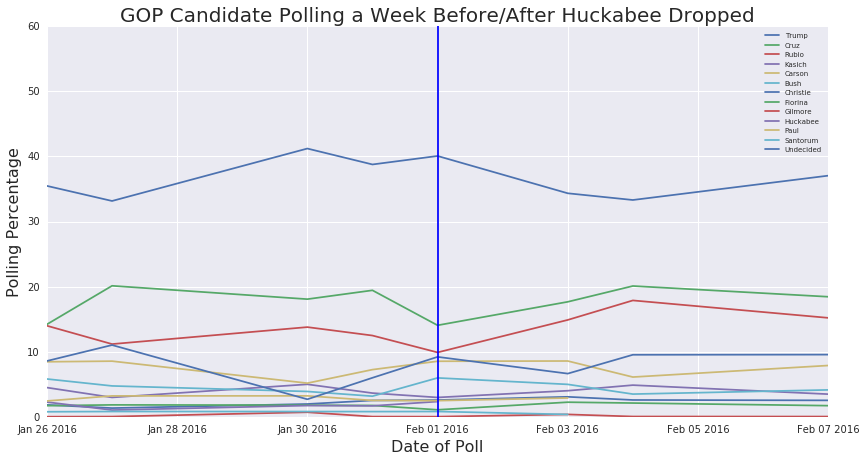

In [17]:
stats.PlotChart(candidates, pollList[5]['poll'], 'Huckabee')

Rubio gained 3.61 percentage points in polling, or 57.06% of all polling gains, going up from 12.26 to 15.87
after Huckabee suspended his campaign giving up 1.81 polling percentage and other candidates lost a cumulative 4.52.


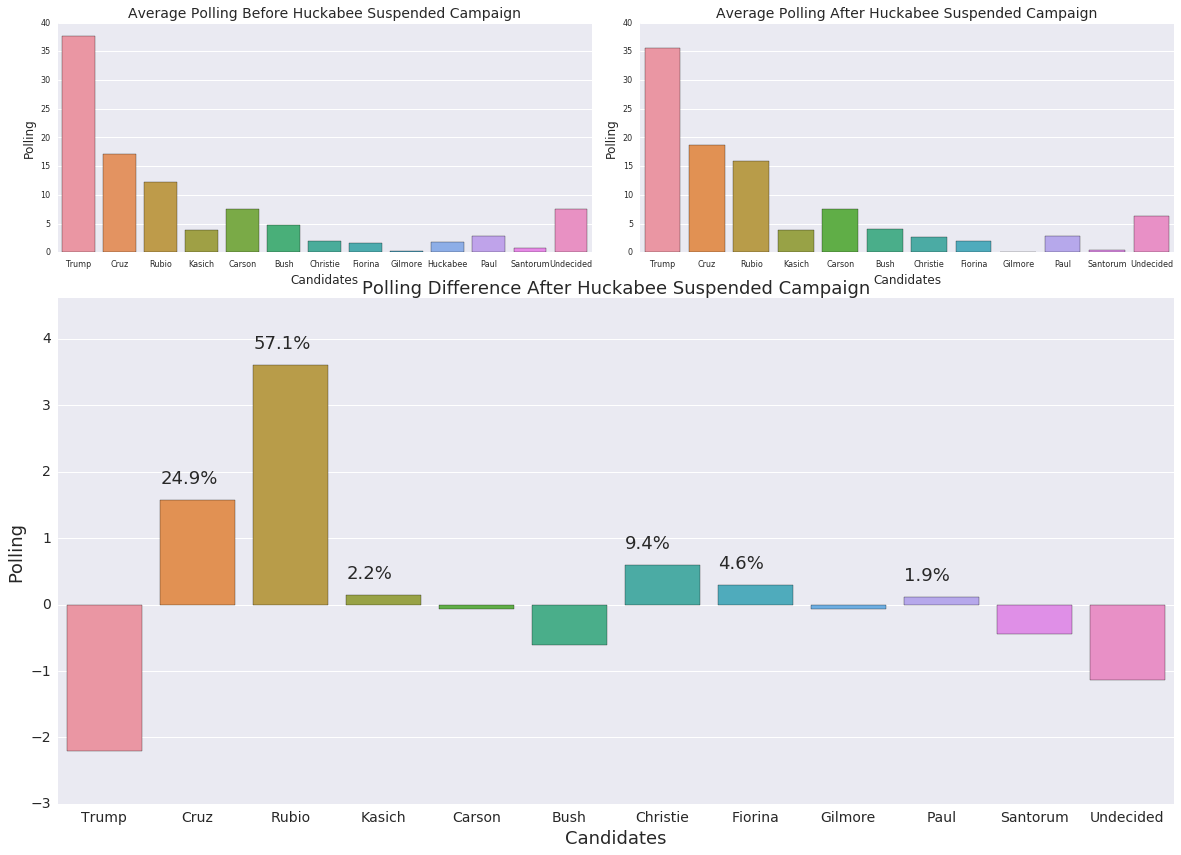

In [18]:
PlotPolling('Huckabee')

### Rand Paul and Rick Santorum Suspend Their Campaigns

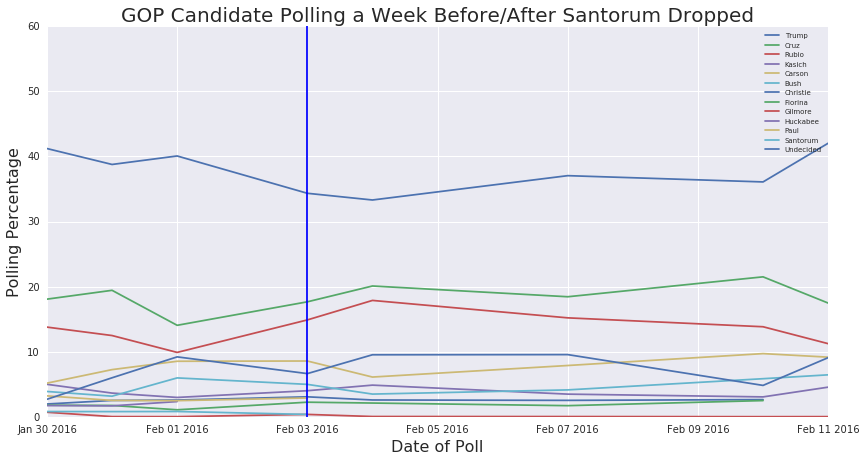

In [19]:
stats.PlotChart(candidates, pollList[7]['poll'], 'Santorum')

Cruz gained 1.90 percentage points in polling, or 33.62% of all polling gains, going up from 17.30 to 19.21
after Santorum suspended his campaign giving up 0.70 polling percentage and other candidates lost a cumulative 4.96.


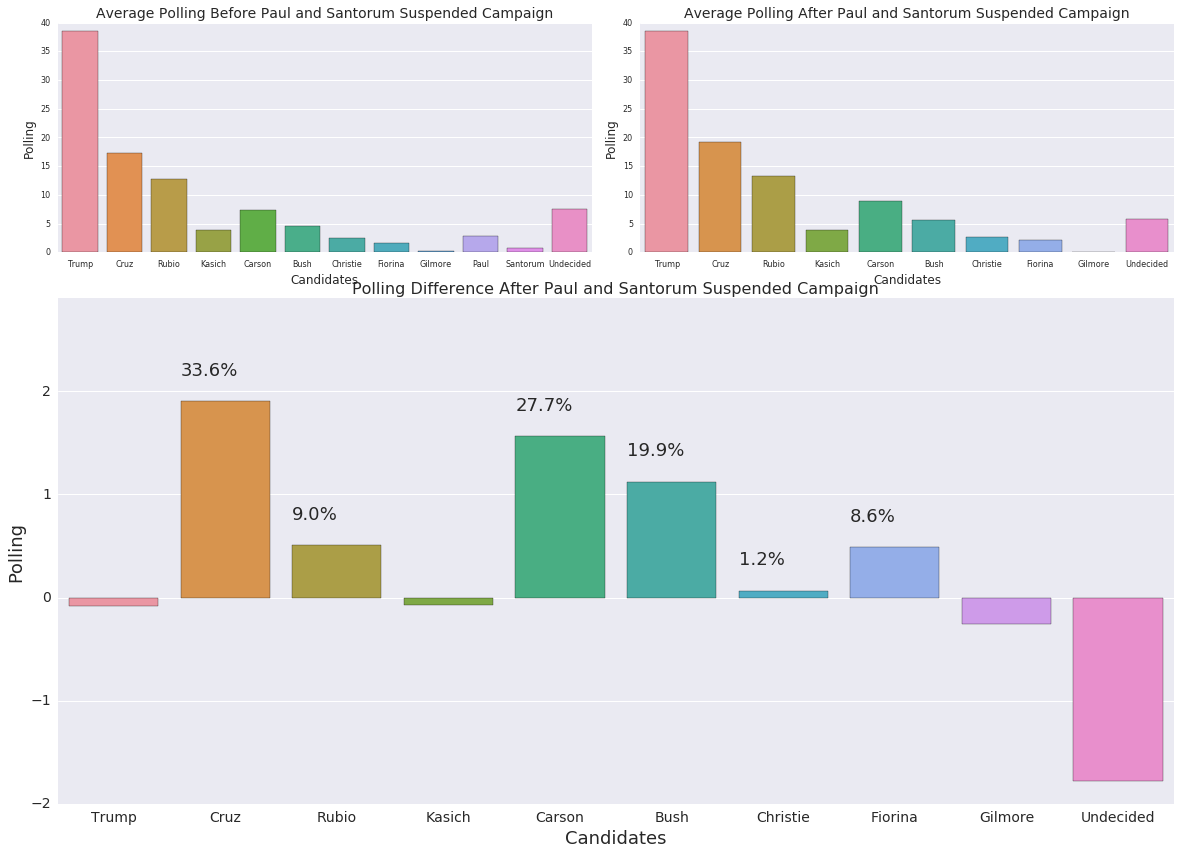

In [20]:
PlotPolling('Santorum')

### Chris Christie and Carly Fiorina Suspend Their Campaigns

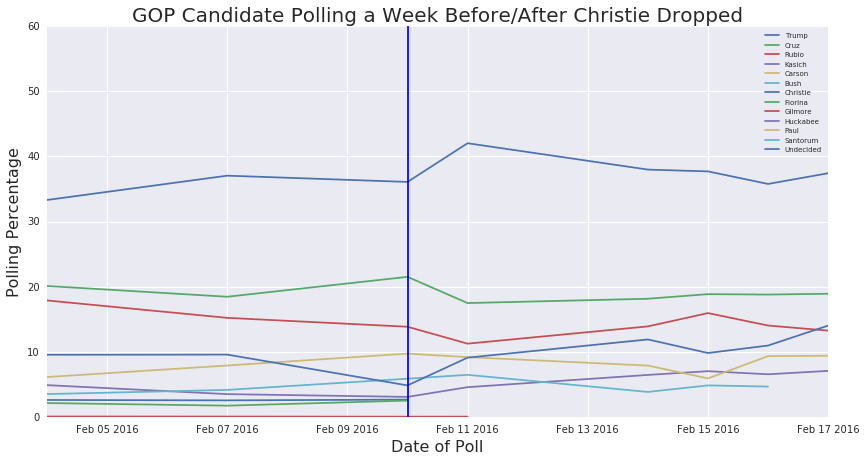

In [21]:
stats.PlotChart(candidates, pollList[2]['poll'], 'Christie')

Kasich gained 2.89 percentage points in polling, or 37.88% of all polling gains, going up from 3.80 to 6.69
after Christie suspended his campaign giving up 2.58 polling percentage and other candidates lost a cumulative 5.05.


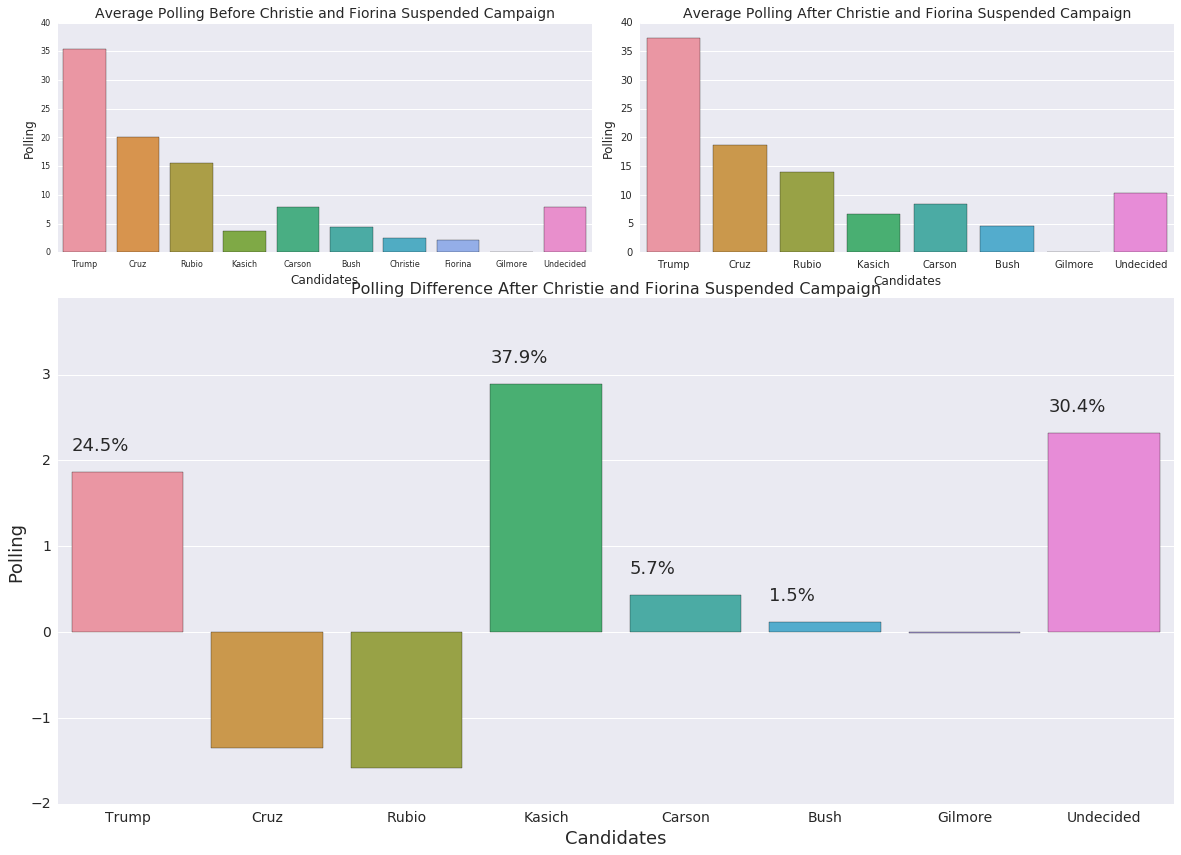

In [22]:
PlotPolling('Christie')

### Jim Gilmore Suspends His Campaign

In [23]:
pollList

[{'index': 0,
  'name': 'Carson',
  'poll':                 Trump       Cruz      Rubio     Kasich    Carson  Bush  \
  date                                                                     
  2016-02-27  43.206111  17.554444  14.999722   6.068611  8.208889   NaN   
  2016-02-28  39.246278  18.210389  18.423722   6.384778  7.829444   NaN   
  2016-03-02  39.949111  16.723111  17.884778   8.175444  9.118333   NaN   
  2016-03-06  36.501278  21.853722  16.066778  10.723667       NaN   NaN   
  2016-03-09  40.019556  22.017111  13.146000  10.313000       NaN   NaN   
  2016-03-12  48.151333  20.710889  11.098944   9.034056       NaN   NaN   
  
              Christie  Fiorina  Gilmore  Huckabee  Paul  Santorum  Undecided  
  date                                                                         
  2016-02-27       NaN      NaN      NaN       NaN   NaN       NaN   9.962222  
  2016-02-28       NaN      NaN      NaN       NaN   NaN       NaN   9.905389  
  2016-03-02       NaN     

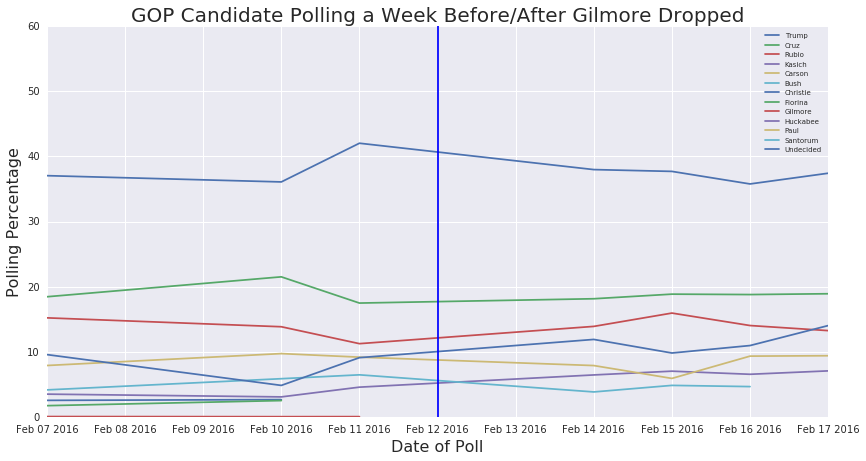

In [24]:
stats.PlotChart(candidates, pollList[4]['poll'], 'Gilmore')

Kasich gained 3.11 percentage points in polling, or 81.43% of all polling gains, going up from 3.70 to 6.81
after Gilmore suspended his campaign giving up 0.03 polling percentage and other candidates lost a cumulative 3.79.


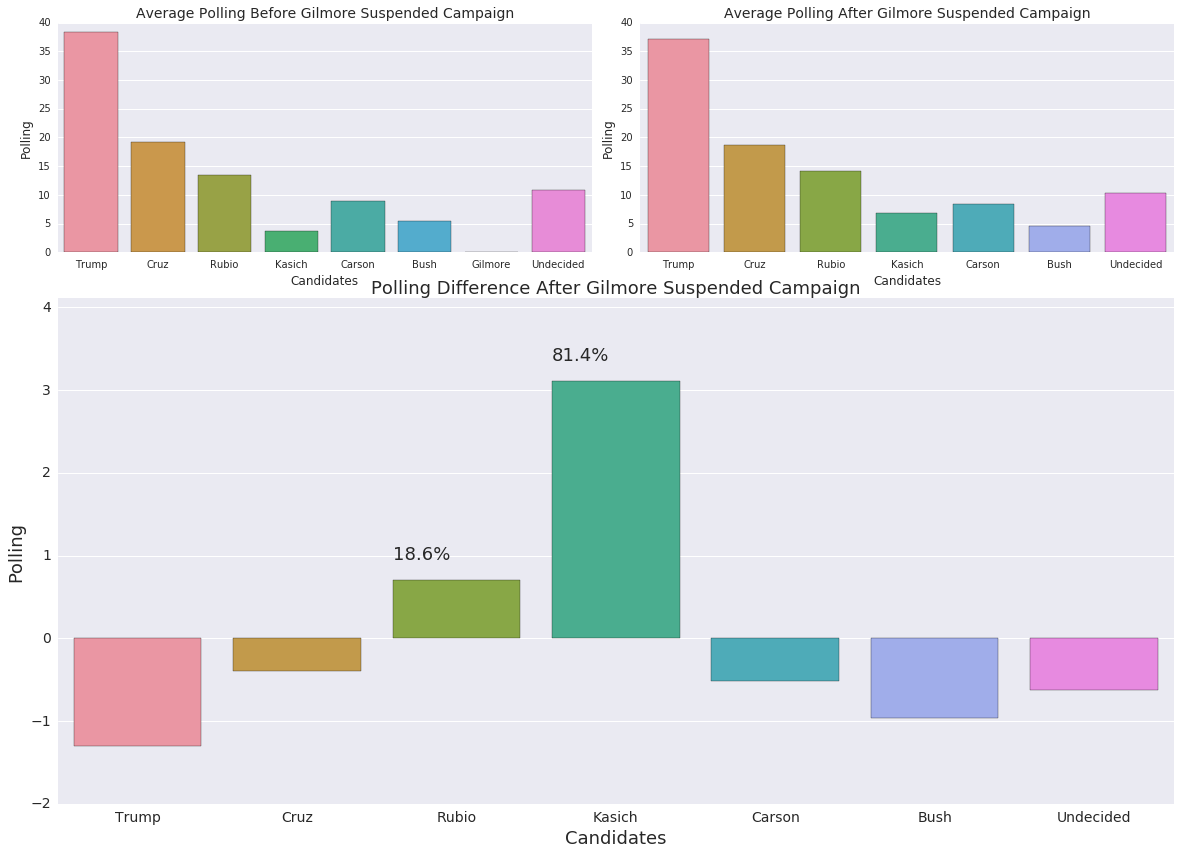

In [25]:
PlotPolling('Gilmore')

### Jeb Bush Suspends His Campaign

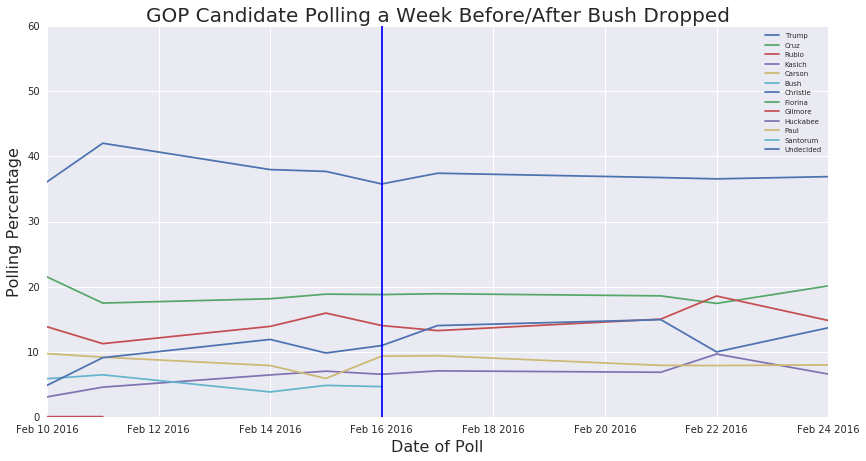

In [26]:
stats.PlotChart(candidates, pollList[1]['poll'], 'Bush')

Undecided gained 2.55 percentage points in polling, or 37.86% of all polling gains, going up from 10.34 to 12.89
after Bush suspended his campaign giving up 5.12 polling percentage and other candidates lost a cumulative 1.61.


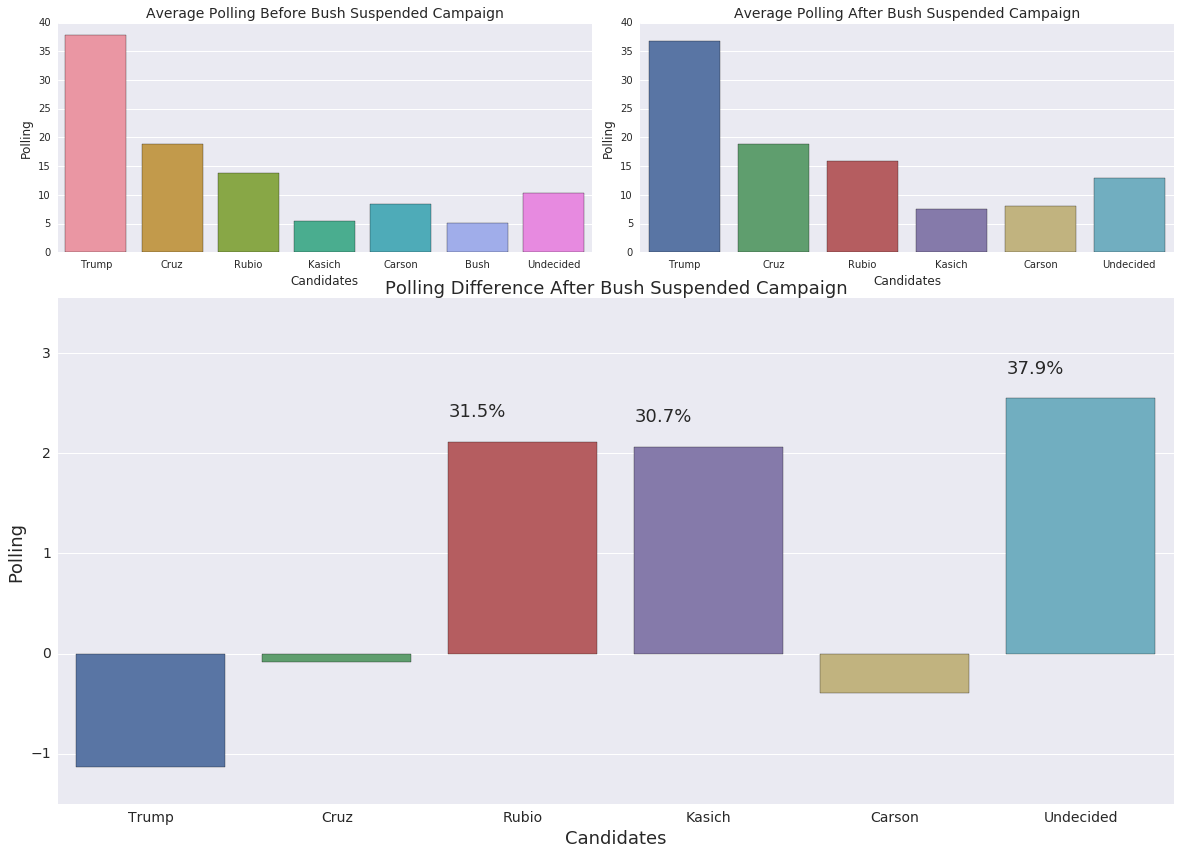

In [27]:
PlotPolling('Bush')

### Ben Carson Suspends His Campaign
It doesn't look like Carson's endorsement of Trump helped Trump noticeably.

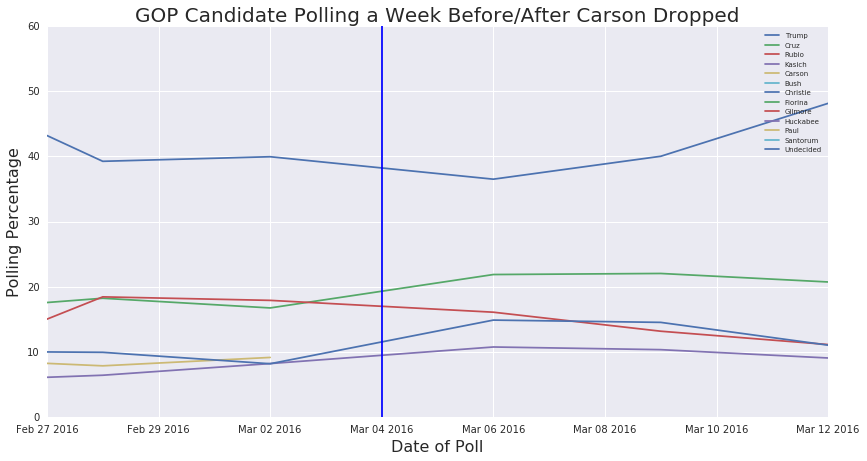

In [28]:
stats.PlotChart(candidates, pollList[0]['poll'], 'Carson')

Cruz gained 3.80 percentage points in polling, or 25.65% of all polling gains, going up from 17.50 to 21.30
Undecided gained 3.35 percentage points in polling, or 29.15% of all polling gains, going up from 9.34 to 12.68
after Carson suspended his campaign giving up 8.39 polling percentage and other candidates lost a cumulative 4.66.


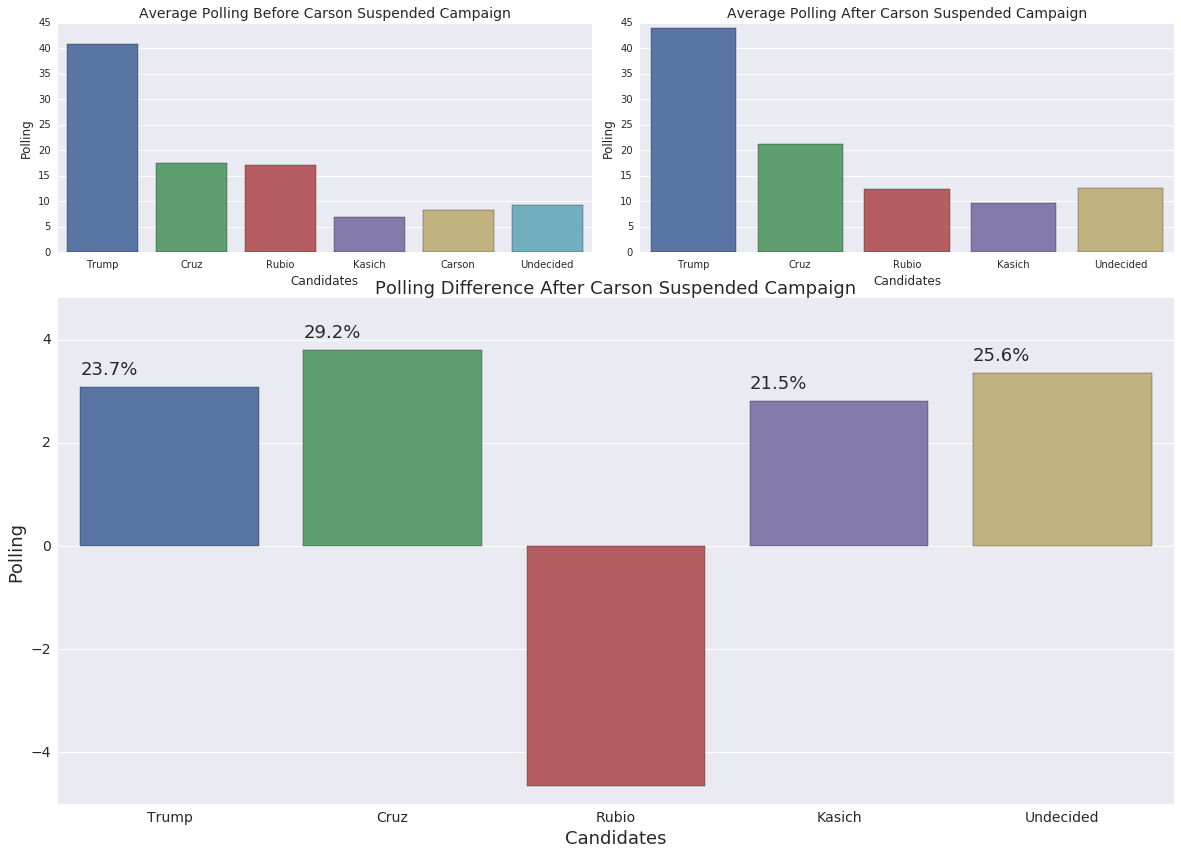

In [29]:
PlotPolling('Carson')